#  🏠 **Airbnb Price Analysis**  
## **Understanding the Factors Influencing Airbnb Prices in European Cities**  

### **Contributors**  
- **Tu Nguyen**
- **Djeno van de Stadt**

📅 **Date:** 31 January 2025<br>
📊 **Course:** Data Wrangling

---

## **Project Overview**  
This study examines the key factors influencing Airbnb prices in 10 major European cities.  
The analysis focuses on three main aspects:  
1. **Location** – Distance from city center, metro accessibility, and attraction index.  
2. **Host Characteristics** – Superhost status and business hosts (≥6 active listings).
3. **Guest Satisfaction** – Overall rating for guest satisfaction.


In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)
%matplotlib inline

## **Data Loading and Cleaning**  

The dataset used in this study, **[Airbnb's Pricing Dataset](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities)**, is adopted from the research by **Gyódi and Nawaro (2021)**. It consists of multiple CSV files containing Airbnb listings across different European cities.  

Each city has **two datasets**:  
- **Weekdays** listings  
- **Weekends** listings  

### **Steps in Data Preparation:**  
1. **Load** all CSV files into a single DataFrame.  
2. **Extract** relevant information and handle missing values.  
3. **Remove outliers** to ensure data consistency for further analysis.  


In [80]:
csv_files = [
    'Dataset/amsterdam_weekdays.csv',
    'Dataset/amsterdam_weekends.csv',
    'Dataset/athens_weekdays.csv',
    'Dataset/athens_weekends.csv',
    'Dataset/barcelona_weekdays.csv',
    'Dataset/barcelona_weekends.csv',
    'Dataset/berlin_weekdays.csv',
    'Dataset/berlin_weekends.csv',
    'Dataset/budapest_weekdays.csv',
    'Dataset/budapest_weekends.csv',
    'Dataset/lisbon_weekdays.csv',
    'Dataset/lisbon_weekends.csv',
    'Dataset/london_weekdays.csv',
    'Dataset/london_weekends.csv',
    'Dataset/paris_weekdays.csv',
    'Dataset/paris_weekends.csv',
    'Dataset/rome_weekdays.csv',
    'Dataset/rome_weekends.csv',
    'Dataset/vienna_weekdays.csv',
    'Dataset/vienna_weekends.csv'
]

dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    df['city'] = file.split('/')[-1].split('_')[0].capitalize()
    if file.endswith('days.csv'):
        df['is_weekend'] = False
    else:
        df['is_weekend'] = True
    dfs.append(df)
    
airbnb = pd.concat(dfs, ignore_index=True)
airbnb.head()
    

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,is_weekend
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,False
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,False
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,False
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,False
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,False


In [81]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

In [82]:
cleaned_data = airbnb.copy()

In [83]:
# Remove unnecessary columns
cleaned_data.drop(columns=['Unnamed: 0', 'attr_index', 'rest_index', 'room_type', 'room_shared', 'room_private', 'person_capacity', 'multi', 'cleanliness_rating', 'bedrooms', 'lng', 'lat'], inplace=True)
cleaned_data = cleaned_data.reset_index(drop=True)

In [84]:
# Columns renamed for clarity
cleaned_data.rename(columns={'realSum': 'price', 'dist':'center_dist'}, inplace=True)

In [85]:
# Remove duplicate rows
cleaned_data.drop_duplicates(inplace=True)

In [86]:
# Handle missing values if needed
cleaned_data.isnull().sum()

price                         0
host_is_superhost             0
biz                           0
guest_satisfaction_overall    0
center_dist                   0
metro_dist                    0
attr_index_norm               0
rest_index_norm               0
city                          0
is_weekend                    0
dtype: int64

In [87]:
# Convert 'multi' and 'biz' into boolean data type for further analysis
cleaned_data['biz'] = cleaned_data['biz'].astype(bool)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 51706
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   host_is_superhost           51707 non-null  bool   
 2   biz                         51707 non-null  bool   
 3   guest_satisfaction_overall  51707 non-null  float64
 4   center_dist                 51707 non-null  float64
 5   metro_dist                  51707 non-null  float64
 6   attr_index_norm             51707 non-null  float64
 7   rest_index_norm             51707 non-null  float64
 8   city                        51707 non-null  object 
 9   is_weekend                  51707 non-null  bool   
dtypes: bool(3), float64(6), object(1)
memory usage: 3.3+ MB


### **Handling Outliers**

Outliers can distort our analysis by **inflating averages** and **misrepresenting trends**. To ensure a more reliable dataset, we first **visualized the price distribution** using two key plots:

#### 1️⃣ **Price Distribution (KDE Plot)**
- The **Kernel Density Estimation (KDE) plot** shows that most Airbnb prices are **clustered at lower values**, while a few listings have **extremely high prices**.
- These **long tails** in the distribution indicate **potential outliers**, which could **skew our analysis** if left unfiltered.

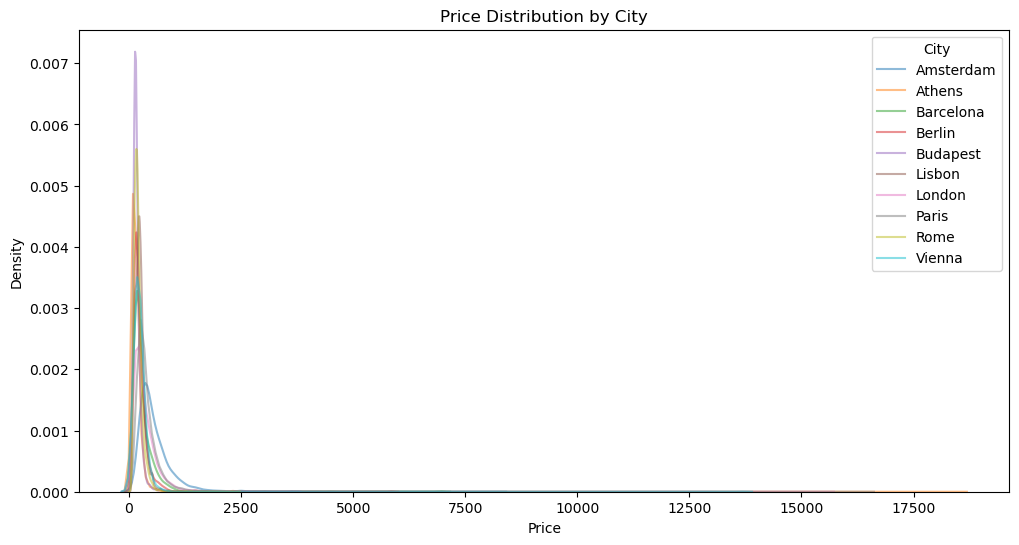

In [88]:
cities = cleaned_data['city'].unique()

# Density plot
plt.figure(figsize=(12,6))
for city in cities:
    city_data = cleaned_data[cleaned_data['city'] == city]['price']
    sns.kdeplot(city_data, label=city, alpha=0.5)
    
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution by City')
plt.legend(title='City')

plt.show()

#### 2️⃣ **Box Plot by City**
- To further inspect **city-level outliers**, we used **box plots** to visualize price distributions across different cities.
- The box plot highlights **several extreme values**, especially in **London, Paris, and Amsterdam**, where some listings are priced significantly higher than the majority.

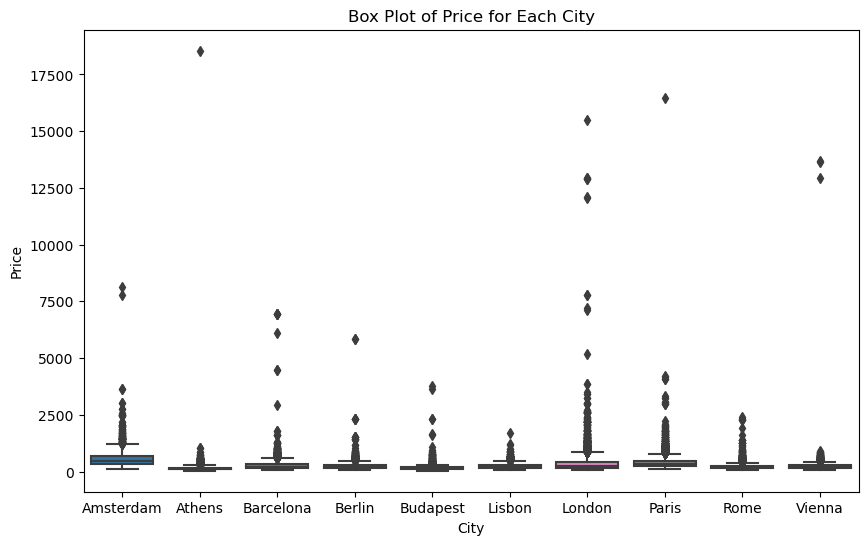

In [89]:
# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='city', y='price', data=cleaned_data)

plt.title('Box Plot of Price for Each City')
plt.xlabel('City')
plt.ylabel('Price')

plt.show()

#### **Defining Outliers**
To set objective boundaries, we applied the **Interquartile Range (IQR) method**:
- **Q1 (25th percentile)**: The lower boundary of typical prices.
- **Q3 (75th percentile)**: The upper boundary of typical prices.
- **IQR (Q3 - Q1)**: The spread of the central 50% of the data.
- **Outlier Threshold**: Any price **below Q1 - 1.5×IQR** or **above Q3 + 1.5×IQR** is considered an outlier.

This method allows us to remove the extreme outliers while maintaining meaningful variations in the data.

In [90]:
city_groups = cleaned_data.groupby('city')['price']
outlier_indices = []

# Identify outliers
for city, prices in city_groups:
    # Calculate Q1 and Q3 and define bounds for outliers
    Q1 = prices.quantile(0.25)
    Q3 = prices.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outlier indices for the city
    city_outliers_indices = cleaned_data[(cleaned_data['city'] == city) 
                                         & ((cleaned_data['price'] < lower_bound) | (cleaned_data['price'] > upper_bound))].index
    
    outlier_indices.extend(city_outliers_indices)
    
# Create a dataframe for outliers
outliers = cleaned_data.loc[outlier_indices]

# Remove outliers from original dataset
non_outliers_df = cleaned_data.drop(index=outlier_indices)

There were a total of 2706 outliers removed.

In [91]:
outliers.shape

(2706, 10)

In [92]:
outliers.groupby('city').size().reset_index(name='outliers count')

,city,outliers count
0,Amsterdam,105
1,Athens,293
2,Barcelona,227
3,Berlin,165
4,Budapest,223
5,Lisbon,192
6,London,531
7,Paris,386
8,Rome,433
9,Vienna,151


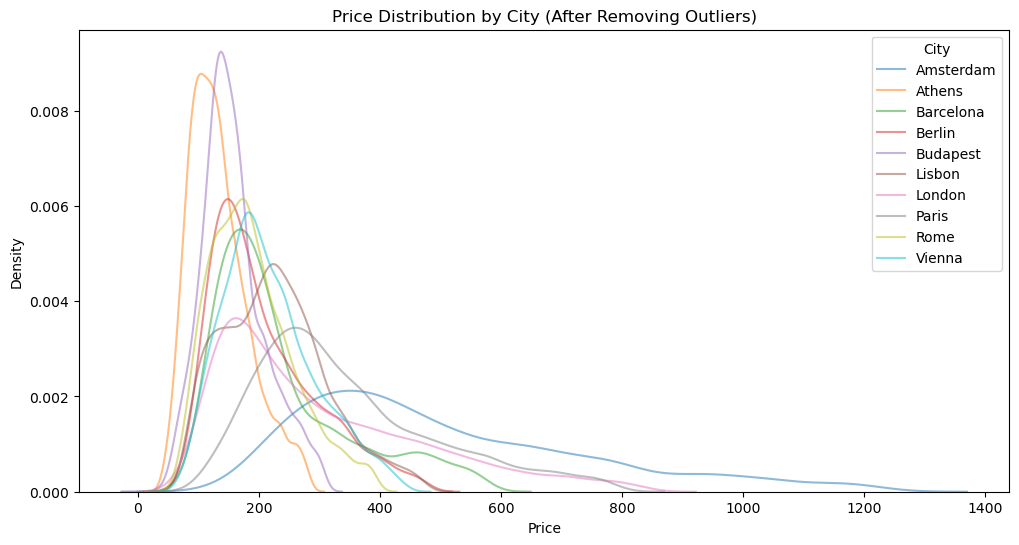

In [93]:
# Density plot post outliers handling
plt.figure(figsize=(12,6))
for city in cities:
    sns.kdeplot(non_outliers_df[non_outliers_df['city'] == city]['price'], label=city, alpha=0.5)
    
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution by City (After Removing Outliers)')
plt.legend(title='City')

plt.show()

In [110]:
non_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49001 entries, 0 to 51706
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   price                       49001 non-null  float64 
 1   host_is_superhost           49001 non-null  bool    
 2   biz                         49001 non-null  bool    
 3   guest_satisfaction_overall  49001 non-null  float64 
 4   center_dist                 49001 non-null  float64 
 5   metro_dist                  49001 non-null  float64 
 6   attr_index_norm             49001 non-null  float64 
 7   rest_index_norm             49001 non-null  float64 
 8   city                        49001 non-null  object  
 9   is_weekend                  49001 non-null  bool    
 10  center_dist_range           49001 non-null  category
 11  metro_dist_range            49001 non-null  category
 12  guest_satisfaction_range    42064 non-null  category
dtypes: bool(3), cate

## **Analysis**  
### **1️⃣ Location-Based Factors**  

This section explores how different **location-based factors**—**distance from the city center, metro accessibility, attraction index, and restaurant index**—affect Airbnb pricing across **10 major European cities**.  

#### **Key Findings:**  
- **City center distance** has a **strong negative correlation** with price, especially in **Amsterdam and Barcelona**, where central locations are highly valued.  
- **Metro distance** shows a **weaker correlation**, suggesting that **proximity to the city center** is more important than metro access for pricing.  
- In **Rome and Paris**, where attractions are more decentralized, **proximity to tourist sites or high-rated restaurants** can also contribute to **higher prices**.  

#### **Notes**:
- **Attraction index** and **restaurant index** indicate how close a listing is to highly reviewed tourist attractions and restaurants in the cities, more information can be found [here](https://www.sciencedirect.com/science/article/pii/S0261517721000388?via%3Dihub).

In [94]:
# Identify correlation between price and location-based factors per city
city_df = non_outliers_df.groupby('city')[['price', 'center_dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm']].corr()

# Filter out all correlation of 1
city_df_filtered = city_df[city_df['price'] < 1].reset_index()

# Rename price column to correlation
city_df_filtered.rename(columns={'price' : 'correlation'}, inplace=True)

city_df_filtered

,city,level_1,correlation,center_dist,metro_dist,attr_index_norm,rest_index_norm
0,Amsterdam,center_dist,-0.319552,1.000000,0.388631,-0.707773,-0.739923
1,Amsterdam,metro_dist,-0.188494,0.388631,1.000000,-0.450234,-0.458300
2,Amsterdam,attr_index_norm,0.274272,-0.707773,-0.450234,1.000000,0.864937
3,Amsterdam,rest_index_norm,0.288044,-0.739923,-0.458300,0.864937,1.000000
4,Athens,center_dist,-0.366246,1.000000,0.075296,-0.566264,-0.451706
...,...,...,...,...,...,...,...
35,Rome,rest_index_norm,0.482781,-0.468968,0.104675,0.794050,1.000000
36,Vienna,center_dist,-0.307730,1.000000,0.571246,-0.617693,-0.696553
37,Vienna,metro_dist,-0.169614,0.571246,1.000000,-0.313020,-0.327195
38,Vienna,attr_index_norm,0.310505,-0.617693,-0.313020,1.000000,0.900816


In [95]:
# Find the strongest correlation by absolute value for each city
city_df_filtered['abs_correlation'] = city_df_filtered['correlation'].abs()

# Get the factor with the highest absolute correlation per city
strongest_factors = city_df_filtered.loc[city_df_filtered.groupby('city')['abs_correlation'].idxmax()]

# Drop the extra column used for sorting
strongest_factors = strongest_factors.drop(columns=['abs_correlation'])

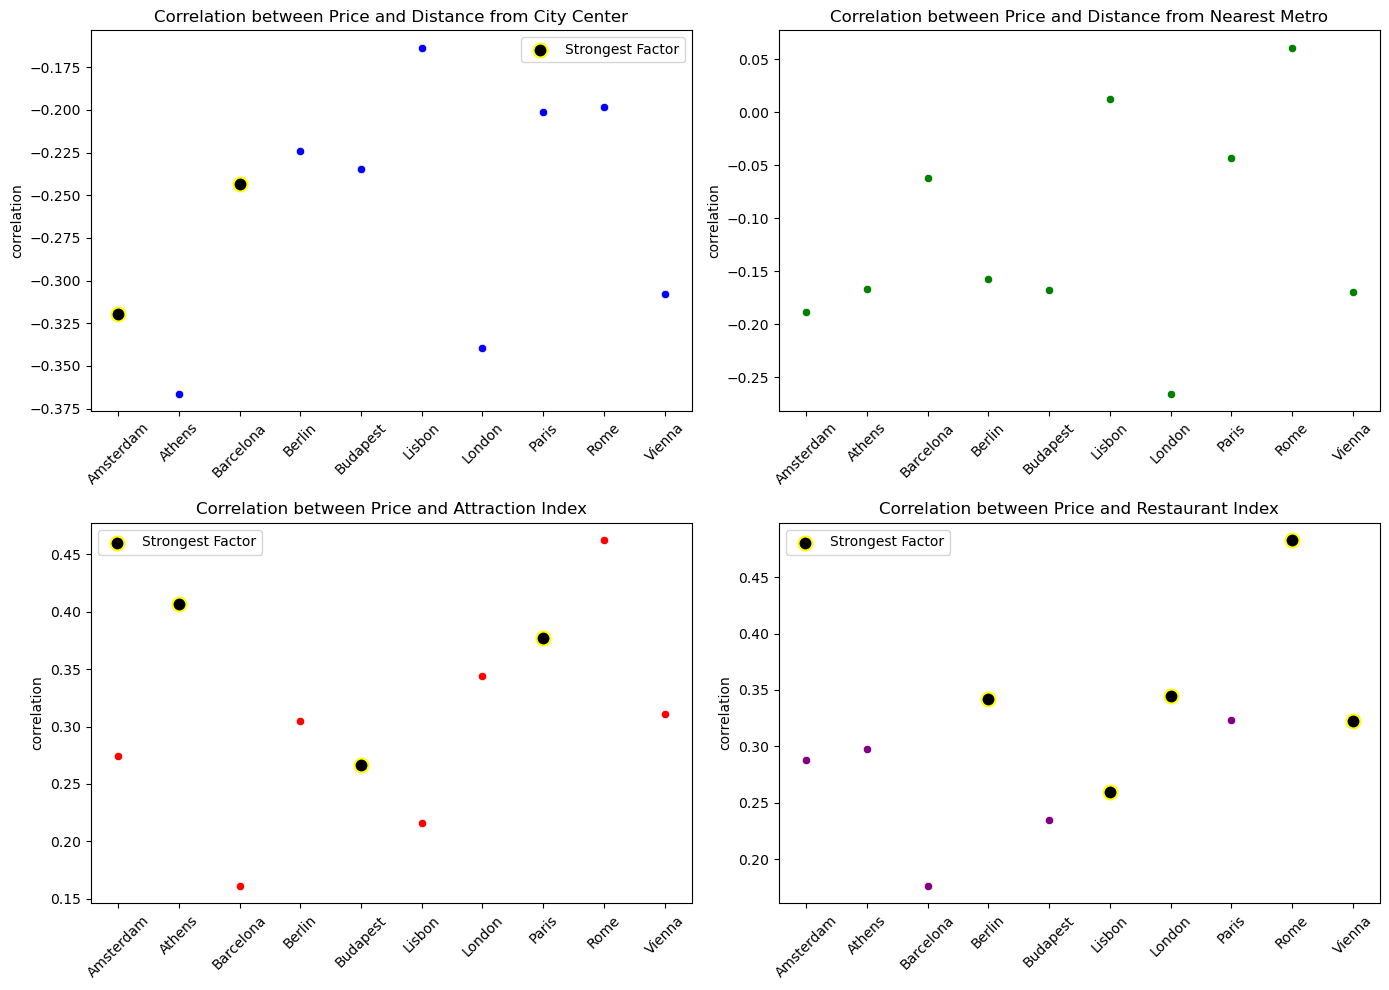

In [96]:
# Creating a 2x2 subplot layout for better visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define colors and titles
colors = {'center_dist': 'b', 'metro_dist': 'g', 'attr_index_norm': 'r', 'rest_index_norm': 'purple'}

title_dict = {
    'center_dist': 'Correlation between Price and Distance from City Center',
    'metro_dist': 'Correlation between Price and Distance from Nearest Metro',
    'attr_index_norm': 'Correlation between Price and Attraction Index',
    'rest_index_norm': 'Correlation between Price and Restaurant Index'
}

# Plot scatter for each factor
for i, factor in enumerate(colors.keys()):
    row, col = i // 2, i % 2  # Define subplot position
    factor_df = city_df_filtered[city_df_filtered['level_1'] == factor]

    # Scatter plot
    sns.scatterplot(data=factor_df, x='city', y='correlation', ax=axes[row, col], color=colors[factor])
    
    # Highlight strongest factor for each city
    strongest_factor_df = strongest_factors[strongest_factors['level_1'] == factor]
    sns.scatterplot(data=strongest_factor_df, x='city', y='correlation', ax=axes[row, col], 
                    color='black', marker='o', s=100, edgecolor="yellow", linewidth=1.5, label="Strongest Factor")

    axes[row, col].set_title(title_dict[factor], fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_xlabel("")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

#### **What did we find?**  
- **City center distance** has the strongest negative correlation in **Amsterdam and Barcelona**, while **attraction index and restaurant index** are the dominant factors in most other cities.  
- **Metro distance** shows a weaker negative correlation across all cities.  
- Although **attraction index and restaurant index** are the strongest factors in **8 out of 10 cities**, their difference from **city center distance** is minimal—except in **Paris and Rome**, where decentralized tourist sites explain their higher influence.  

#### **What’s next?**  
- **Further investigation** of **city center distance** and **metro distance** by clustering into smaller bins.  
- **Reasoning:** City center distance is a **more generalizable** pricing factor across cities, and while metro distance has a **lower correlation**, it remains an important consideration for tourists when selecting accommodations.


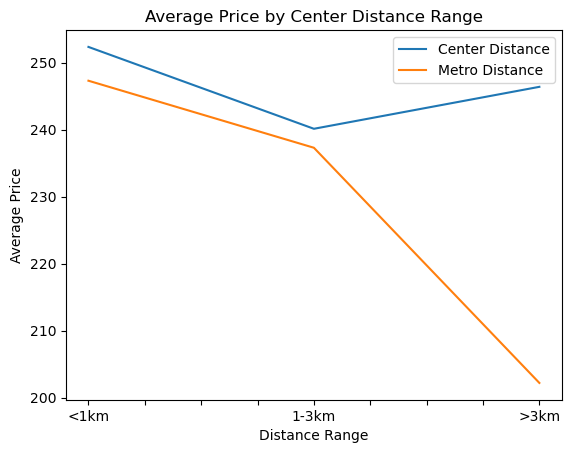

In [97]:
# Add Columns for center_dist, metro_dist <1km, 1-3km and 3km>
non_outliers_df['center_dist_range'] = pd.cut(non_outliers_df['center_dist'], bins=[0, 1, 3, float('inf')], labels=['<1km', '1-3km', '>3km'])
non_outliers_df['metro_dist_range'] = pd.cut(non_outliers_df['metro_dist'], bins=[0, 1, 3, float('inf')], labels=['<1km', '1-3km', '>3km'])

# Group by distance
avg_price_center = non_outliers_df.groupby('center_dist_range', observed=False)['price'].mean().reset_index()
avg_price_metro = non_outliers_df.groupby('metro_dist_range', observed=False)['price'].mean().reset_index()

# Plot Dataframes
ax = avg_price_center.plot(kind='line',
                           x='center_dist_range',
                           y='price',
                           title='Average Price by Center Distance Range')

avg_price_metro.plot(ax=ax, x='metro_dist_range', y='price')
ax.set_xlabel('Distance Range')
ax.set_ylabel('Average Price')
ax.legend(['Center Distance', 'Metro Distance'])
plt.show()

**Price Trends by Distance**
- **City center distance has a clear impact on pricing**, with prices decreasing as distance increases.
- **Metro distance follows a similar trend**, but prices drop significantly beyond **3km**, likely due to limited data points in this range (approximately 2%).

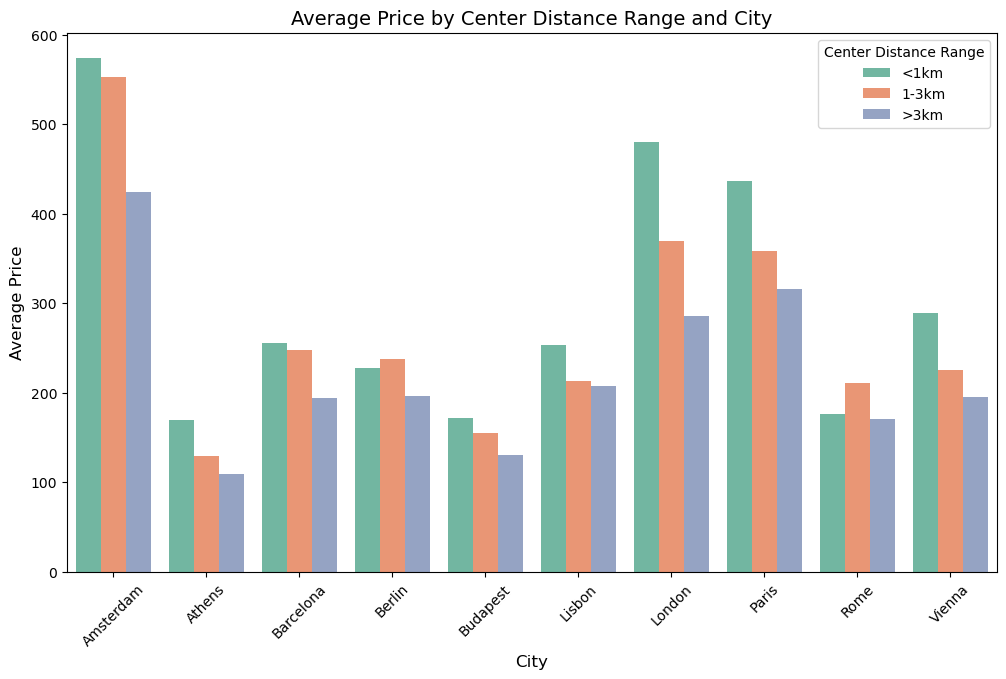

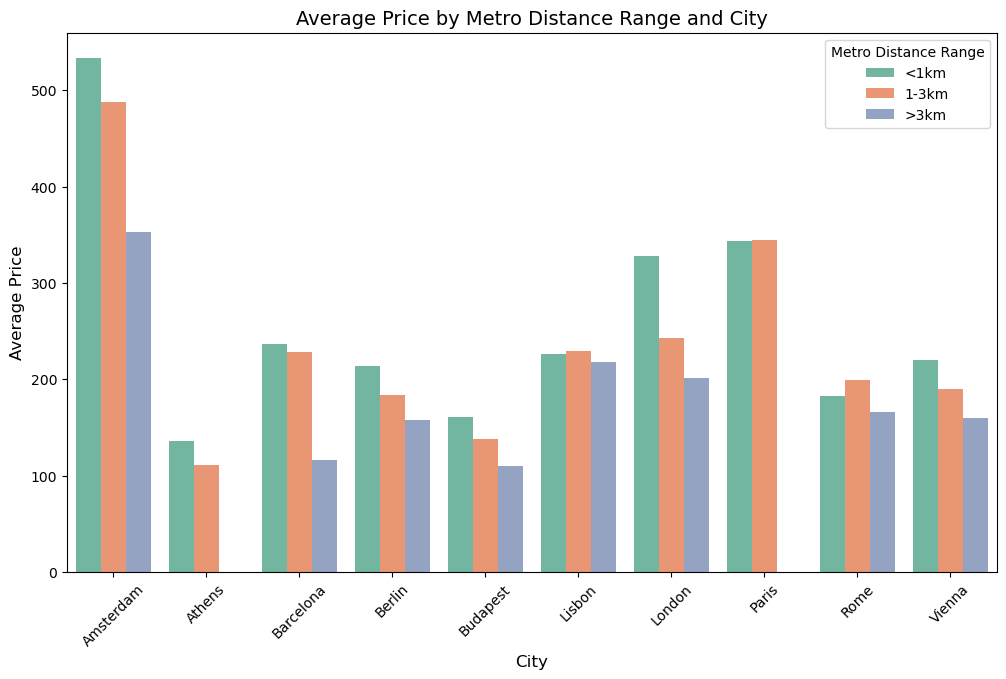

In [98]:
# Group by distance and city
avg_price_center_city = non_outliers_df.groupby(['city', 'center_dist_range'], observed=False)['price'].mean().reset_index()
avg_price_metro_city = non_outliers_df.groupby(['city', 'metro_dist_range'], observed=False)['price'].mean().reset_index()

# Plot for center distance range vs. price per city
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_price_center_city,
            x='city',
            y='price',
            hue='center_dist_range',
            palette='Set2')

plt.title('Average Price by Center Distance Range and City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Center Distance Range', fontsize=10)
plt.show()

# Plot for metro distance range vs. price per city
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_price_metro_city,
            x='city',
            y='price',
            hue='metro_dist_range',
            palette='Set2')

plt.title('Average Price by Metro Distance Range and City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Metro Distance Range', fontsize=10)
plt.show()

**Price Variations by City**
- City center distance remains a major factor in most cities, particularly in Amsterdam, Barcelona, London, and Paris, where prices drop noticeably in farther locations.
- Metro distance impact varies—some cities (e.g., Paris, Berlin, and Lisbon) show relatively stable pricing across metro ranges, suggesting tourists may rely less on metro accessibility.
- Exceptions like Paris & Rome reinforce previous findings—pricing may depend more on decentralized attractions than proximity to the absolute city center.

### 2️⃣ **Host Characteristics**

This section examines how **superhost status** and **business host** influence Airbnb pricing.

#### **Key Findings**
- **Superhosts charge lower prices** than non-superhosts, despite their higher credibility.
- **Business hosts** set higher prices than individual hosts, likely due to professional pricing strategies.
- **Superhost status has little impact on pricing at the city level**, suggesting other factors are more influential.

#### **Superhost Status Analysis**

In [99]:
from scipy import stats
df_host = non_outliers_df.groupby('host_is_superhost')['price'].mean().reset_index()
display(df_host)

superhost = non_outliers_df[non_outliers_df['host_is_superhost'] == True]['price']
non_superhost = non_outliers_df[non_outliers_df['host_is_superhost'] == False]['price']

t_stat, p_val = stats.ttest_ind(superhost, non_superhost)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")

,host_is_superhost,price
0,False,251.523475
1,True,224.237779


t-statistic: -18.07295620682948
p-value: 8.978576685643673e-73


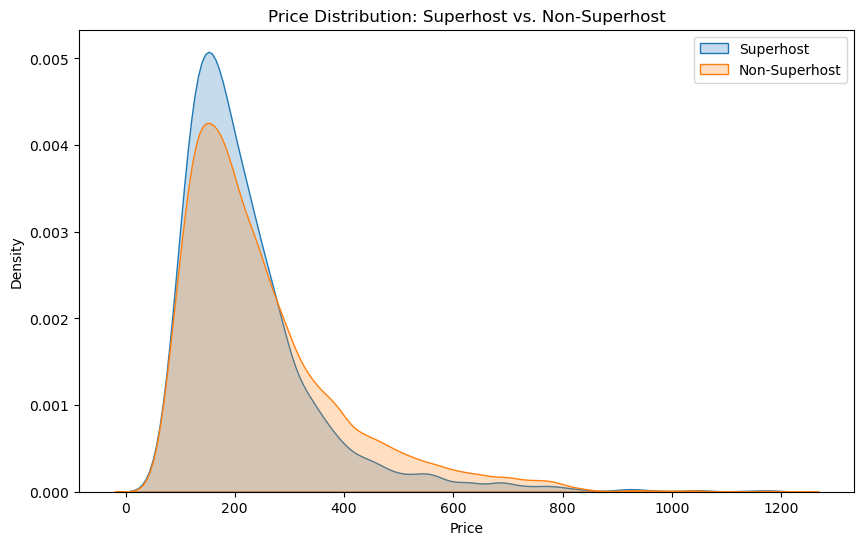

In [100]:
plt.figure(figsize=(10, 6))
sns.kdeplot(non_outliers_df[non_outliers_df['host_is_superhost'] == True]['price'], label="Superhost", fill=True)
sns.kdeplot(non_outliers_df[non_outliers_df['host_is_superhost'] == False]['price'], label="Non-Superhost", fill=True)
plt.title("Price Distribution: Superhost vs. Non-Superhost")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

The density plot shows **similar price distributions** for both groups, but superhosts tend to **concentrate slightly more on lower-price accommodations**.

<Figure size 1400x800 with 0 Axes>

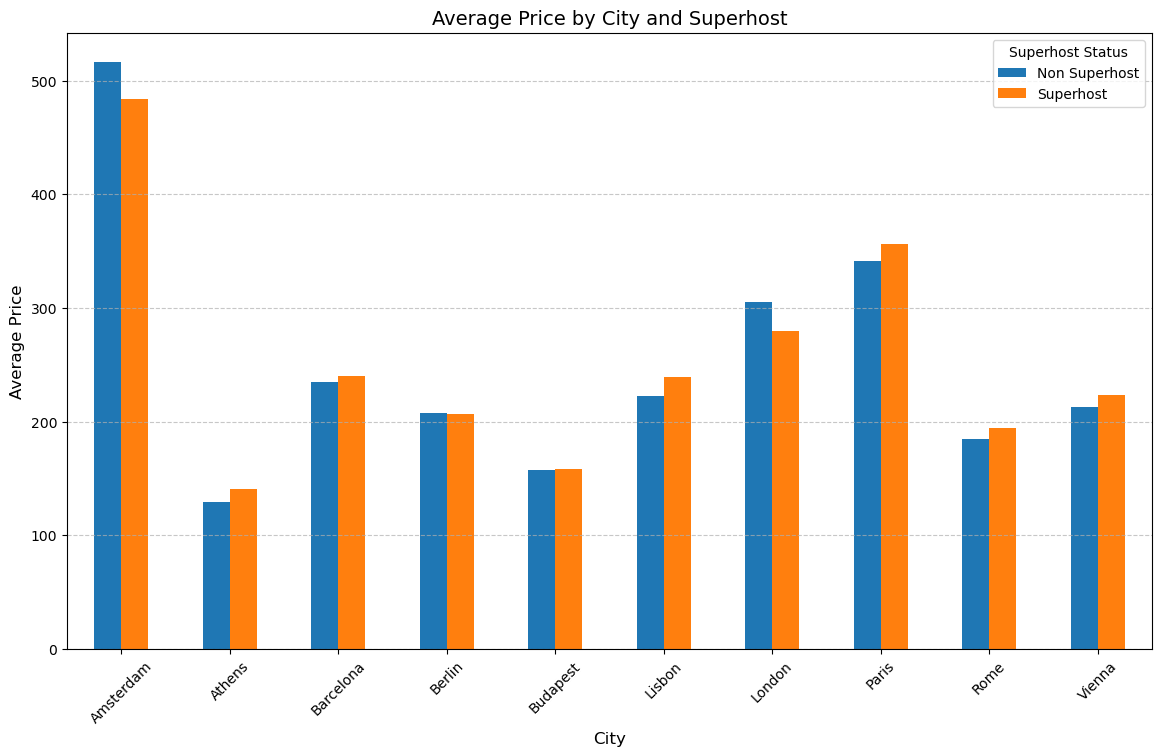

In [101]:
# Group by city and superhost status to calculate mean price
df_host_city = non_outliers_df.groupby(['city', 'host_is_superhost'])['price'].mean().reset_index()

df_host_city = df_host_city.pivot(index='city', columns='host_is_superhost', values='price')


plt.figure(figsize=(14, 8)) 
df_host_city.plot(kind='bar', figsize=(14, 8))
plt.title('Average Price by City and Superhost', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Non Superhost', 'Superhost'], title="Superhost Status", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar plot shows **minimal price differences** between superhosts and non-superhosts at the city level. In most cities, except for **Amsterdam, London**, and to some extent **Berlin**, **superhosts charge higher prices**. The large number of non-superhost listings in Amsterdam and London, where they charge more, may have **skewed the overall effect**. Thus, while the impact of superhost status is statistically significant, it should be interpreted with caution.

#### **Business Host Analysis**

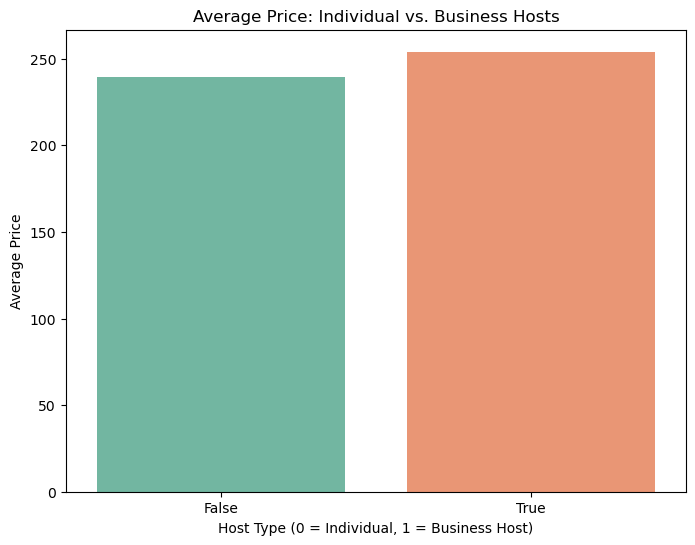

In [102]:
avg_price_host_type = non_outliers_df.groupby('biz')['price'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_price_host_type, x='biz', y='price', palette='Set2')
plt.title("Average Price: Individual vs. Business Hosts")
plt.xlabel("Host Type (0 = Individual, 1 = Business Host)")
plt.ylabel("Average Price")
plt.show()

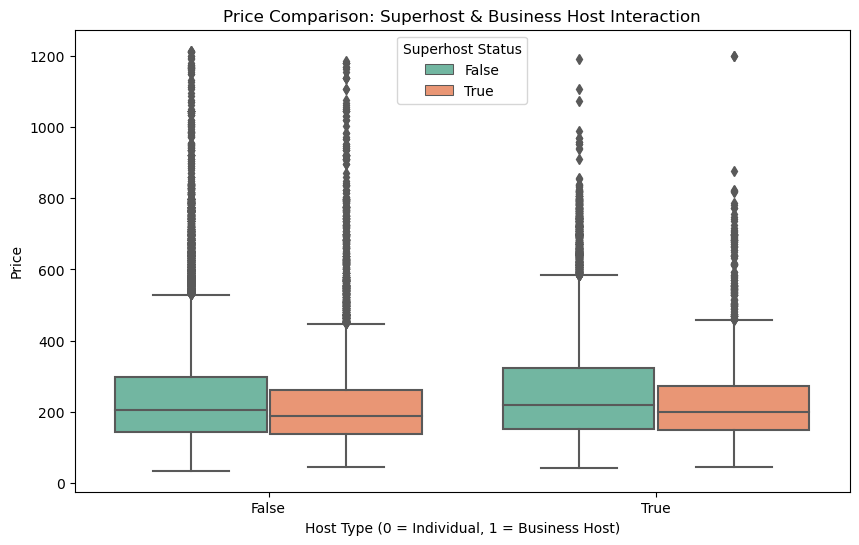

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=non_outliers_df, x='biz', y='price', hue='host_is_superhost', palette='Set2')
plt.title("Price Comparison: Superhost & Business Host Interaction")
plt.xlabel("Host Type (0 = Individual, 1 = Business Host)")
plt.ylabel("Price")
plt.legend(title="Superhost Status")
plt.show()


- **Business hosts generally set higher prices** than individual hosts.
- The interaction box plot shows that business hosts tend to charge more regardless of superhost status, indicating that the number of listings a host has is a stronger predictor of price than superhost designation.

### 3️⃣ **Guest Satisfaction**

This section investigates the relationship between guest satisfaction ratings and Airbnb pricing. Ratings on Airbnb are generally high and Airbnb itself also removes listings that consistently have rating lower than 4.0 (equivalent to 80 in this scale). Therefore, the focus is on highly rated properties (85+), segmented into three categories: **85-90, 90-95, and 95-100**. The goal is to determine whether higher ratings are associated with higher prices.

#### **Key Findings**
- The ANOVA test indicates a statistically significant difference in prices among the three satisfaction groups (p = 0.028), but the effect is relatively weak.
- On average, listings with **higher ratings (95-100)** tend to have **slightly higher prices**, but the differences across groups are minimal.
- The trend varies by city, with **Amsterdam** showing the clearest price increase for higher satisfaction, while other cities display only marginal differences.


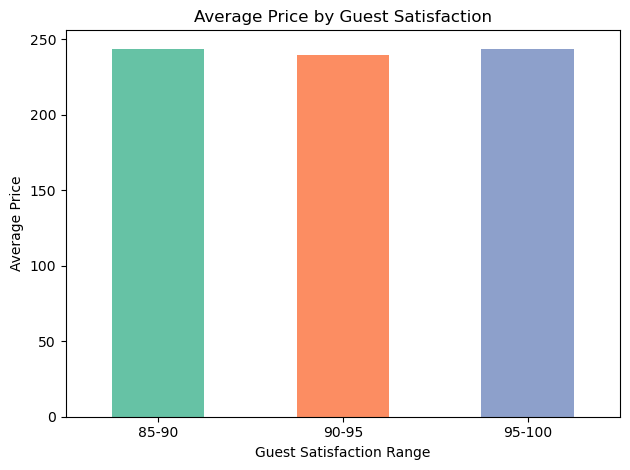

In [104]:
# Make bins for guest satisfaction
non_outliers_df['guest_satisfaction_range'] = pd.cut(non_outliers_df['guest_satisfaction_overall'], bins=[85, 89.99, 94.99, float('inf')], labels=['85-90', '90-95', '95-100'])
avg_price_satisfaction = non_outliers_df.groupby('guest_satisfaction_range', observed=False)['price'].mean().reset_index()

# Plot the grouped bar chart
ax = avg_price_satisfaction.plot(
    kind='bar', 
    x='guest_satisfaction_range', 
    y='price', 
    title='Average Price by Guest Satisfaction Range', 
    legend=False,
    color = sns.color_palette("Set2")
    )
plt.xlabel('Guest Satisfaction Range')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.title('Average Price by Guest Satisfaction')
plt.tight_layout()
plt.show()


In [114]:
non_outliers_df.groupby('guest_satisfaction_range')['price'].mean()

guest_satisfaction_range
85-90     243.784347
90-95     239.647681
95-100    243.866565
Name: price, dtype: float64

Higher guest satisfaction **does not strongly correlate** with significantly higher prices. The price variation between the three satisfaction groups is small, suggesting that rating alone is not a major pricing determinant.

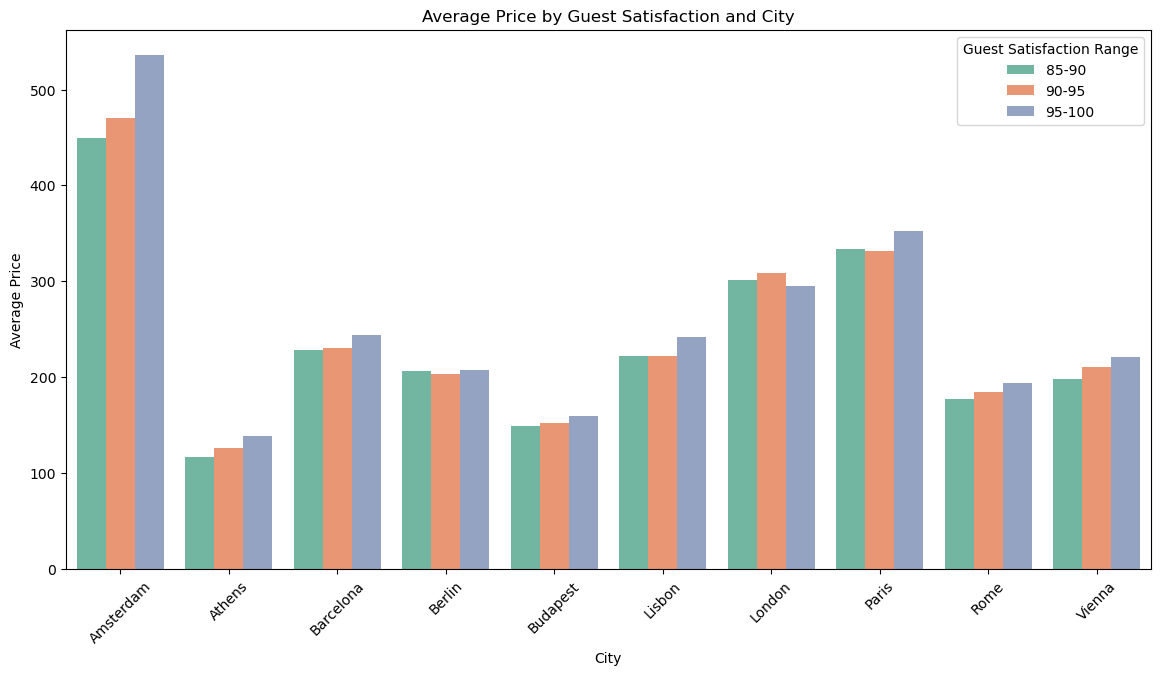

In [105]:
# Check if satisfaction rates have impact per city
avg_price_satisfaction_city = non_outliers_df.groupby(['city', 'guest_satisfaction_range'], observed=False)['price'].mean().reset_index()

# Make barplot for satisfaction rate
plt.figure(figsize=(14,7))
sns.barplot(data=avg_price_satisfaction_city,
            x='city',
            y='price',
            hue='guest_satisfaction_range',
            palette='Set2')

plt.xticks(rotation=45)
plt.title('Average Price by Guest Satisfaction and City')
plt.xlabel('City', fontsize= 10)
plt.ylabel('Average Price')
plt.legend(title='Guest Satisfaction Range')

The second chart highlights **city-specific variations**. In some cities (e.g., Amsterdam, Paris), listings with higher satisfaction ratings command higher prices, while in others (e.g., Berlin, London), the differences are negligible.

In [106]:
# Drop NaN values in guest_satisfaction_range
valid_data = non_outliers_df.dropna(subset=['guest_satisfaction_range'])

# Group data for ANOVA
anova_groups = [
    valid_data[valid_data['guest_satisfaction_range'] == group]['price']
    for group in valid_data['guest_satisfaction_range'].unique()
]

# Perform ANOVA
anova_result = stats.f_oneway(*anova_groups)
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


F-statistic: 3.5670887876641544, p-value: 0.028246483531246695


While the ANOVA test confirms a significant difference, the **magnitude of the effect is small**. This suggests that while satisfaction plays a role in pricing, it is not a dominant factor compared to **location and host characteristics.**

/Users/tunguyen/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


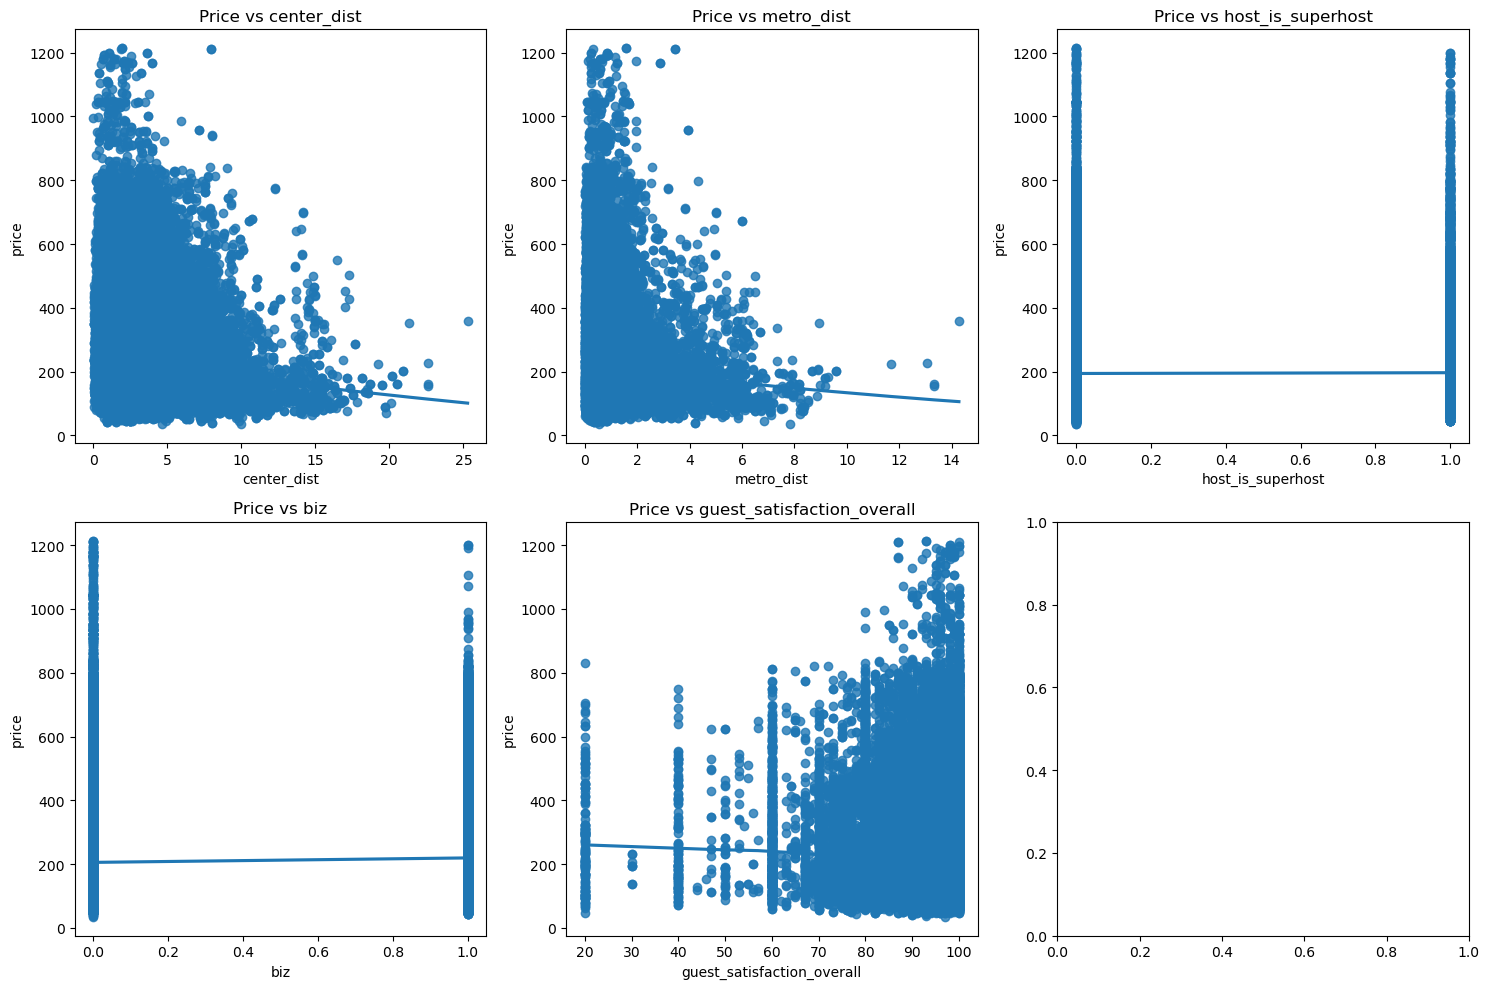

In [107]:
import statsmodels.api as sm

variables = ['center_dist', 'metro_dist', 'host_is_superhost', 'biz', 'guest_satisfaction_overall']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.regplot(x=non_outliers_df[var], y=non_outliers_df['price'], lowess=True, ax=axes[row, col])
    axes[row, col].set_title(f'Price vs {var}')

plt.tight_layout()
plt.show()

We chose to transform only `guest_satisfaction_overall` due to its U-shaped effect. Despite the right-skewed distribution of `center_dist` and `metro_dist`, we kept them in their natural form for easier interpretation and practical reasons—being 10 km from a metro station could indicate being outside the city, making log transformation less meaningful.

In [108]:
# Copy dataframe for transformations
df_transformed = non_outliers_df.copy()

# Add quadratic term for guest satisfaction
df_transformed['guest_satisfaction_squared'] = df_transformed['guest_satisfaction_overall'] ** 2

# Ensure categorical variables (superhost, business host) are encoded as 0/1
df_transformed['host_is_superhost'] = df_transformed['host_is_superhost'].astype(int)
df_transformed['biz'] = df_transformed['biz'].astype(int)

# Define independent variables
X = df_transformed[['center_dist', 'metro_dist', 'guest_satisfaction_overall', 
                    'guest_satisfaction_squared', 'host_is_superhost', 'biz']]

# Add constant for OLS
X = sm.add_constant(X)

# Define dependent variable
y = df_transformed['price']

# Fit the model
model_transformed = sm.OLS(y, X).fit()

# Display results
print(model_transformed.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          9.08e-162
Time:                        01:41:48   Log-Likelihood:            -3.1341e+05
No. Observations:               49001   AIC:                         6.268e+05
Df Residuals:                   48994   BIC:                         6.269e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### **Final Conclusions**
- **Superhost status has the strongest effect**, with superhosts charging **€28.88 less** on average, likely due to competitive pricing strategies to maintain high occupancy.
- **Metro distance negatively impacts price**, decreasing €12.02 per km, while city center distance is not statistically significant.
- Guest satisfaction exhibits a **U-shaped relationship**, where higher satisfaction ratings lead to increased prices at the upper end.
- Business hosts charge ~€10.26 more, possibly reflecting premium listings or multi-property management.
- The **low R² (0.015)** suggests that additional factors (e.g., property features, seasonal trends) play a more significant role in determining price.